## **CUSTOMER SERVICE REQUEST ANALYSIS**
#### The aim of this project is to analyze the customer complaints with respect to various factors like city, complaint type, date of complaint etc. Various graphs are made for easy understanding of the data

In [ ]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#loading the dataset
df=pd.read_csv("/content/drive/MyDrive/Datasets/311_Service_Requests_from_2010_to_Present.csv")

<ipython-input-2-82c1d1f1eb32>:2: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/drive/MyDrive/Datasets/311_Service_Requests_from_2010_to_Present.csv")


In [ ]:
#displaying the top 5 contents of the dataset
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [ ]:
#displaying the total rows and columns in dataset
df.shape

(364558, 53)

In [ ]:
#information about the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

In [ ]:
df.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.645580e+05,361560.000000,3.605280e+05,360528.000000,0.0,0.0,0.0,0.0,0.0,360528.000000,360528.000000
mean,3.106595e+07,10858.496659,1.005043e+06,203425.305782,NaN,NaN,NaN,NaN,NaN,40.724980,-73.924946
std,7.331531e+05,578.263114,2.196362e+04,29842.192857,NaN,NaN,NaN,NaN,NaN,0.081907,0.079213
min,2.960737e+07,83.000000,9.133570e+05,121185.000000,NaN,NaN,NaN,NaN,NaN,40.499040,-74.254937
25%,3.049938e+07,10314.000000,9.919460e+05,182945.000000,NaN,NaN,NaN,NaN,NaN,40.668742,-73.972253
50%,3.108795e+07,11209.000000,1.003470e+06,201023.000000,NaN,NaN,NaN,NaN,NaN,40.718406,-73.930643
75%,3.167433e+07,11238.000000,1.019134e+06,222790.000000,NaN,NaN,NaN,NaN,NaN,40.778166,-73.874098
max,3.231065e+07,11697.000000,1.067186e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700715


In [ ]:
#checking for null values
df.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [ ]:
#missing value treatment
df=df.fillna(method='ffill')

In [ ]:
df.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                            0
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                             0
Location Type                          0
Incident Zip                           0
Incident Address                       0
Street Name                            0
Cross Street 1                         0
Cross Street 2                         0
Intersection Street 1                 37
Intersection Street 2                 37
Address Type                           0
City                                   0
Landmark                            2263
Facility Type                          0
Status                                 0
Due Date                               0
Resolution Description                 0
Resolution Action Updated Date         0
Community Board                        0
Borough         

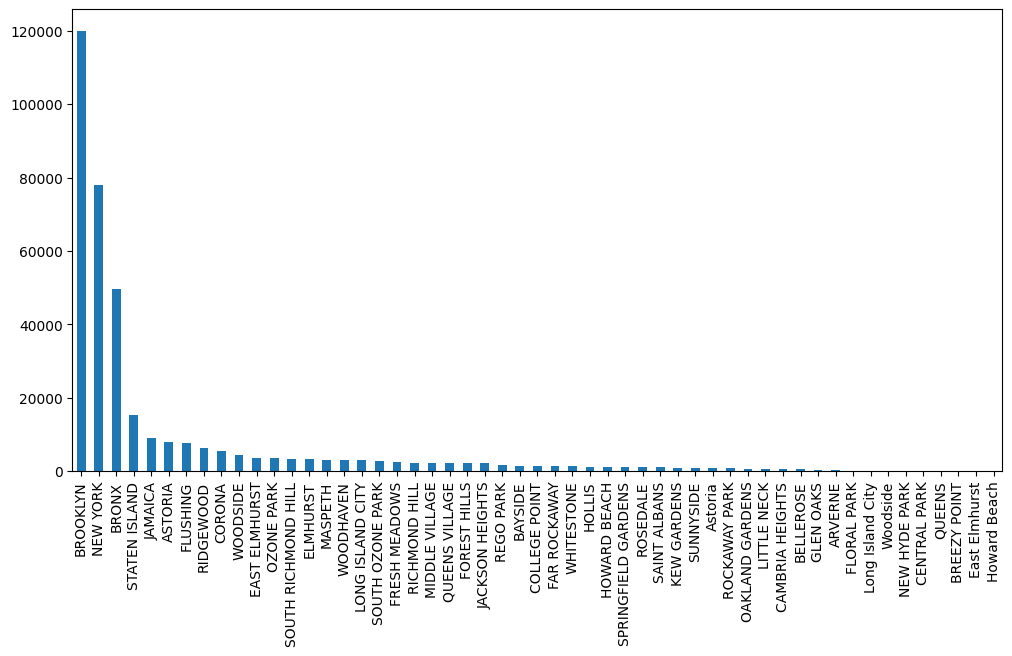

In [ ]:
# City-wise complaints plot
plt.figure(figsize=(12,6))
df['City'].value_counts().plot(kind='bar')
plt.show()

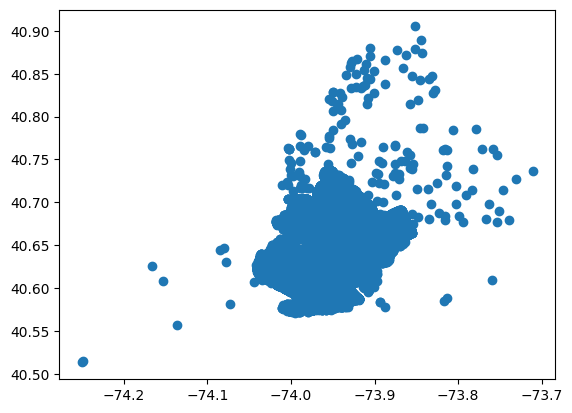

In [ ]:
# Scatter plot of Brooklyn City Complaints
brooklyn_data=df[df['City']=='BROOKLYN']
plt.scatter(brooklyn_data['Longitude'], brooklyn_data['Latitude'])
plt.show()

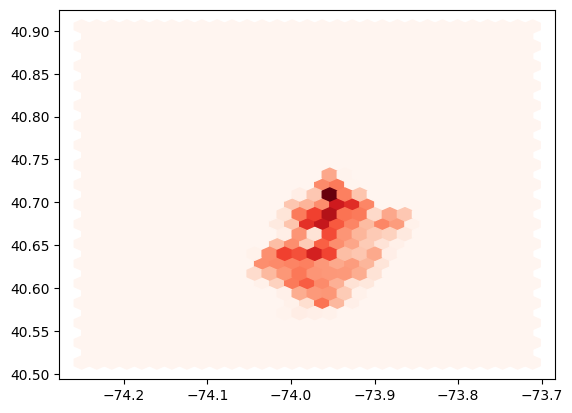

In [ ]:
# Hexabin plot of Brooklyn City Complaints
plt.hexbin(brooklyn_data['Longitude'],brooklyn_data['Latitude'],gridsize=30, cmap='Reds')
plt.show()

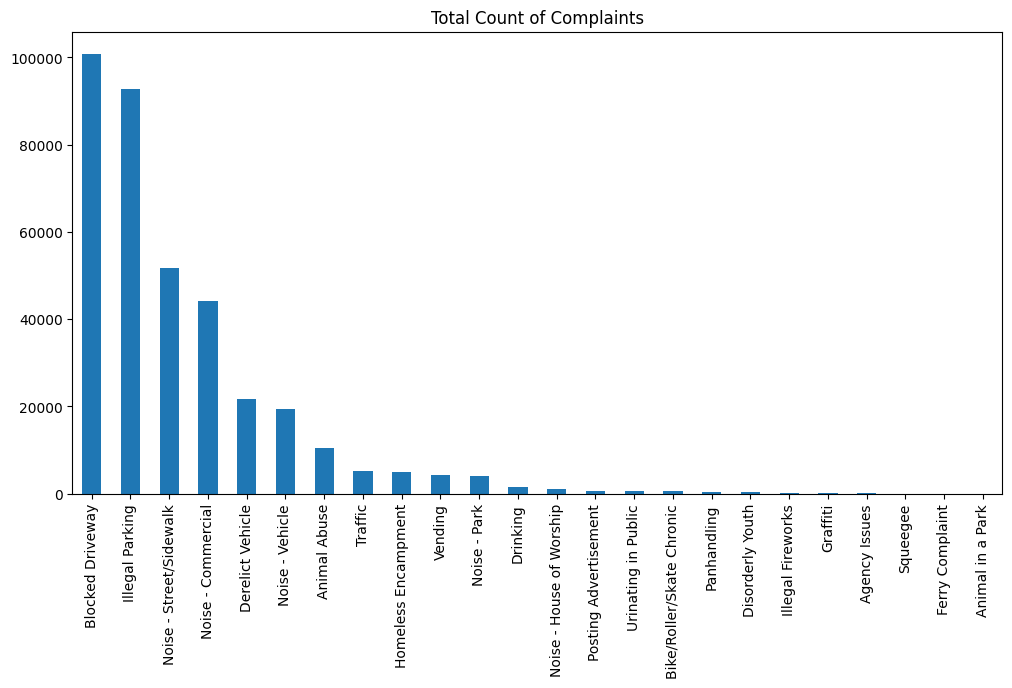

In [ ]:
# Count of different Types of Complaints
plt.figure(figsize=(12,6))
plt.title('Total Count of Complaints')
df['Complaint Type'].value_counts().plot(kind='bar')
plt.show()

<Axes: >

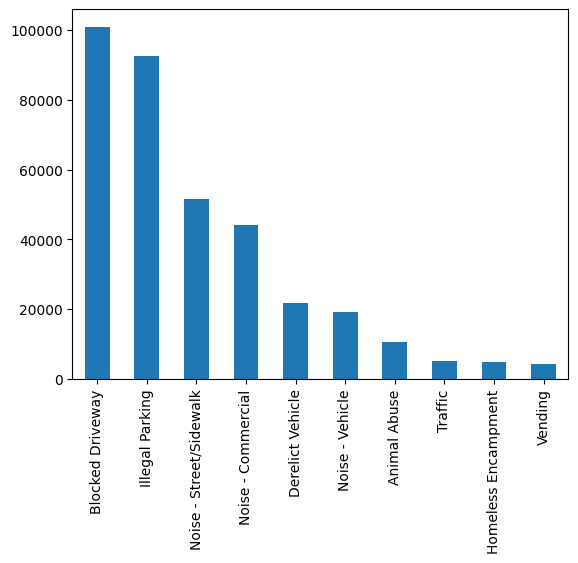

In [ ]:
# Top 10 Complaints across all the Cities
top_10_complaints=df['Complaint Type'].value_counts().head(10)
top_10_complaints.plot(kind='bar')

In [ ]:
# City wise Complaints
City_wise_complaints=df.groupby('City')['Complaint Type'].value_counts()
City_wise_complaints

City      Complaint Type         
ARVERNE   Illegal Parking             62
          Blocked Driveway            51
          Animal Abuse                46
          Derelict Vehicle            32
          Noise - Street/Sidewalk     29
                                    ... 
Woodside  Illegal Parking            125
          Blocked Driveway            27
          Derelict Vehicle             8
          Noise - Street/Sidewalk      5
          Noise - Commercial           2
Name: Complaint Type, Length: 787, dtype: int64

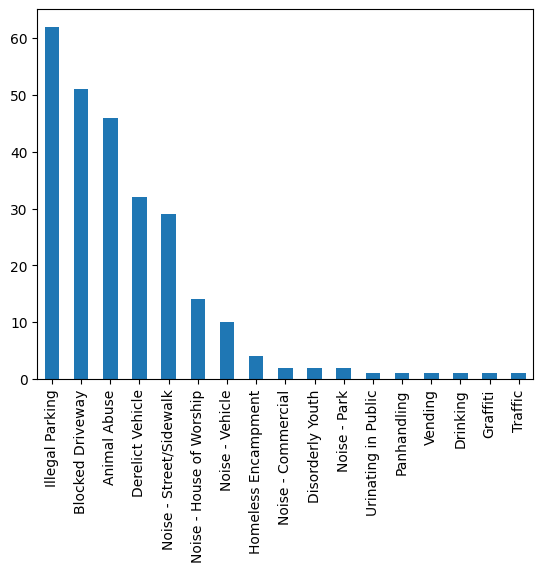

In [ ]:
# Complaints in Arverne City
arverne_complaints=df[df['City']=='ARVERNE']
complaint_count=arverne_complaints['Complaint Type'].value_counts().plot(kind='bar')

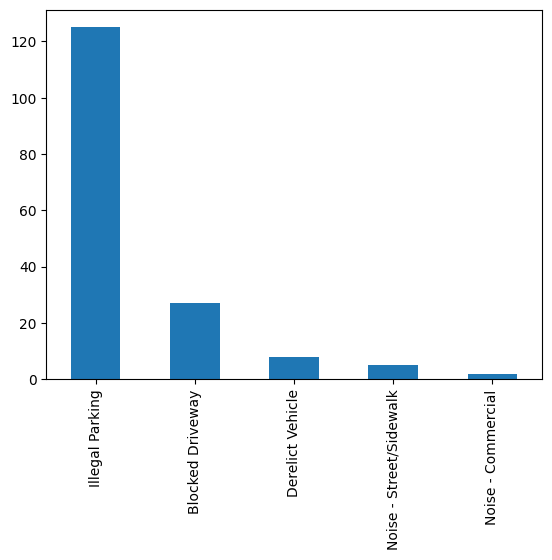

In [ ]:
# Complaints in Woodside City
woodside_complaints=df[df['City']=='Woodside']
complaint_count=woodside_complaints['Complaint Type'].value_counts().plot(kind='bar')

In [ ]:
# Top 10 Cities with Illegal parking complaint
illegal_parking=df[df['Complaint Type']=='Illegal Parking']
illegal_parking_city=illegal_parking['City'].value_counts().head(10)
illegal_parking_city

BROOKLYN         33956
NEW YORK         14826
BRONX            10059
STATEN ISLAND     6276
FLUSHING          2292
RIDGEWOOD         2259
JAMAICA           1728
ASTORIA           1367
MASPETH           1244
FRESH MEADOWS     1163
Name: City, dtype: int64

<Axes: >

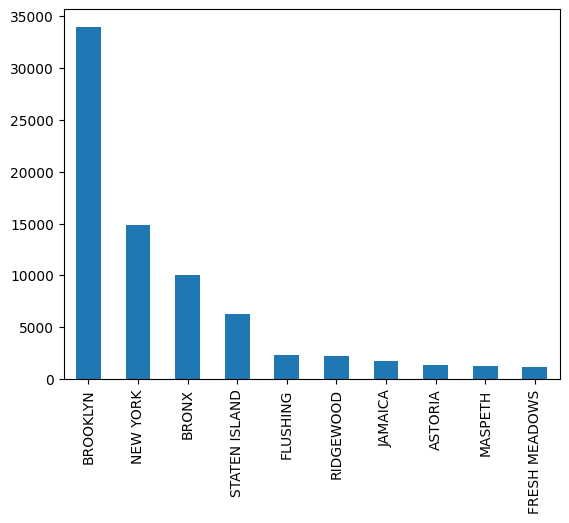

In [ ]:
illegal_parking_city.plot(kind='bar')